# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине, который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, *Xbox*или *PlayStation*). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating
Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

   **Описание данных**

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating
Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

   **Цели исследования**
   
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.   

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy import stats as st
from textwrap import dedent
from IPython import get_ipython


In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower()

In [5]:
#посмотрим процент пропусков в колонках
round((df.isna().mean()*100),2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Проверим датафрейм на явные дубликаты
df.duplicated().sum()

0

**Вывод**

В исходном датасете 16715 строк и 11 столбцов. Есть незначительное количество пропусков в дате выпуска игры и большое количество в столбцах с рейтингом. Посмотрим на данные более детально и подумаем что можно сделать с пропусками, так же не все типы значений соответствуют самим значениям, это тоже надо будет исправить.

## Предобработка данных

In [8]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    
    print(column.describe())



#### 1. Обработка "name"



* Изучим значения


In [9]:

investigate_column(df["name"])


Null or Na count is 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object



* Изменение


In [10]:
df[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df.query('(platform == "GEN") & (year_of_release == 1993.0)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df = df.dropna(subset = ['name']).reset_index(drop=True)

In [13]:
df[df["name"] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E



**Вывод**

Две строки с пропущенными названиями не удалось идентифицировать по году и жанру, поэтому их лучше удалить. В описании таблицы видно,что количество уникальных значений меньше чем количество ячеек, можно подумать что есть дубликаты, так например, строка с названием "Need for Speed: Most Wanted" повторяется 12 раз, если проверить то это игры выходившие в разные года и на разных платформах, так что дубликатов нет.



#### 2. Обработка "platform"



* Изучим значения


In [14]:

investigate_column(df["platform"])


Null or Na count is 0
count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object


In [15]:
df["platform"].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64


**Вывод**

Пропусков нет. Самая популярная платформа - PS2.


#### 3. Обработка "year_of_release"



* Изучим значения


In [16]:

investigate_column(df["year_of_release"])


Null or Na count is 269
count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64



* Изменение


In [17]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [19]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'] = df['year_of_release'].astype(str)


**Вывод**

Пропусков обнаружено 269. Очень сложно подобрать этим пропускам логически подходящую замену, игры со схожими названиями выпускались в разные года, на разных платформах и не понятно чем заменить. Так как количество пропусков не велико их удаление не повлияет на общие данные.

Год выпуска не может иметь тип данных float. Т.к. это не полная дата, нет смысла менять на формат datetime, поменяем сначала на integer чтобы округлить, а потом на object.


#### 4. Обработка "genre"



* Изучим значения


In [20]:

investigate_column(df["genre"])


Null or Na count is 0
count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object


In [21]:
df["genre"].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

**Вывод**

Пропусков нет. Дубликатов нет.


#### 5. Обработка "na_sales"



* Изучим значения


In [22]:

investigate_column(df["na_sales"])


Null or Na count is 0
count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


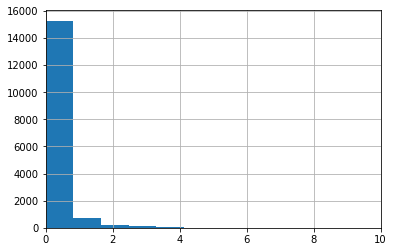

In [23]:
plt.hist(df.na_sales, bins=50)
plt.xlim([0.0, 10])
plt.grid()
plt.show()

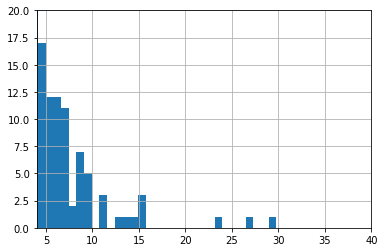

In [24]:
plt.hist(df.na_sales, bins=50)
plt.xlim([4, 40])
plt.ylim([0, 20])
plt.grid()
plt.show()

In [25]:
df['na_sales'][df['na_sales'] == 0].count()


4449


**Вывод**

Большая доля значений равна нулю, значит по многим играм продажи меньше миллиона копий, но некоторые хиты продаются десятками миллионов, согласно медиане середина значений около 80 тысяч проданных копий в северной америке.

Пропусков нет.


#### 6. Обработка "eu_sales"



* Изучим значения


In [26]:

investigate_column(df["eu_sales"])


Null or Na count is 0
count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


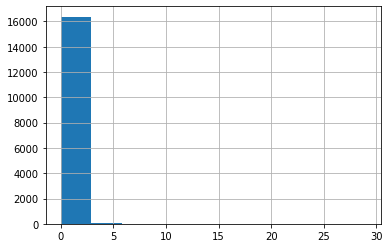

In [27]:
df["eu_sales"].hist();

**Вывод**

Так же как и в продажах по Северной Америке, здесь видим много нулевых и очень маленьких значений, медианное значение - 20 тысяч копий, максимальное - почти 29 миллионов проданных копий, и эти значения единичны. Пропусков в значениях нет.


#### 7. Обработка "jp_sales"



* Изучим значения


In [28]:

investigate_column(df["jp_sales"])


Null or Na count is 0
count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


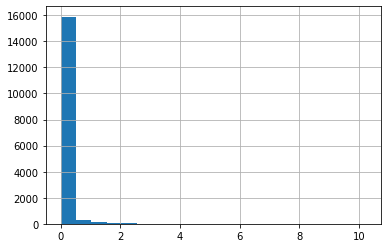

In [29]:
df["jp_sales"].hist(bins=20);

In [30]:
df['jp_sales'][df['jp_sales'] == 0].count()

10300


**Вывод**

Нулевых значений 63%, продажи в Японии явно очень маленькие. Максимальное значение - 10 миллионов проданных копий.



#### 8. Обработка "other_sales"



* Изучим значения


In [31]:

investigate_column(df["other_sales"])


Null or Na count is 0
count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


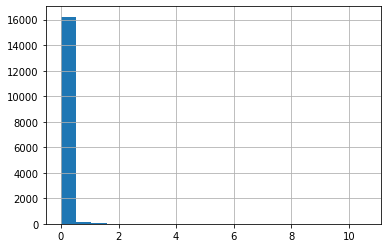

In [32]:
df["other_sales"].hist(bins=20);

In [33]:
df['other_sales'][df['other_sales'] == 0].count()

6492


**Вывод**
 
Доля нулевых значений - 40%, большинство значений меньше миллиона проданных копий. Максимальное значение - 10 миллионов копий.


#### 9. Обработка "critic_score"



* Изучим значения


In [34]:

investigate_column(df["critic_score"])


Null or Na count is 8461
count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64



* Изменение


In [35]:
# посмотрим на строки с пустыми оценками критиков
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



**Вывод**

Обнаружено большое количество пропусков, вероятно на эти игры нет оценок, нет смысла заменять их медианой или средним, чтобы не портить статистику. Оставим пропуски и будем их игнорировать в дальнейших исследованиях.

Пропуски в данной графе возникли вероятно потому что игру не оценили критики или она вышла давно или не стала популярной. Странно например, что такая популярная игра как "Super Mario Bros." не имеет никаких оценок...


#### 10. Обработка "user_score"



* Изучим значения


In [36]:

investigate_column(df["user_score"])


Null or Na count is 6605
count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object



* Изменение


In [37]:
df["user_score"].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [38]:
df[df["user_score"] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [39]:
#  заменим значения  'tbd'  на Nan, а также привдем данные к типу float

df['user_score'] = df['user_score'].replace('tbd',np.nan).astype(float)



**Вывод**

Доля пропущенных значений - 40%, еще часть значений обозначена аббревиатурой tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков.
Чтобы в дальнейшем была возможность обрабатывать данные как числовые, так же как и в прошлом столбце заменим значения на NaN - рейтинг не определен. И приведем к числовому типу данных.


#### 11. Обработка "rating"



* Изучим значения


In [40]:

investigate_column(df["rating"])


Null or Na count is 6676
count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object



* Изменение


In [41]:
df["rating"].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [42]:
df["rating"] = df["rating"].fillna('undefined')

In [43]:
df[df['rating'] == 'undefined']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined



**Вывод**

В столбце указан рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

**EC** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше 

**E - Everyone**  — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. 

**E10+ - Everyone 10 and older** — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. 

**T - Teen** — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. 

**M - Mature** — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. 

**AO - Adults Only 18+** — «Только для взрослых»: Содержание игры только для взрослых. 

**RP - Rating Pending** — «Рейтинг ожидается»: Продукт был отправлен в **ESRB** и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

**K-A** - Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес. В 1998 году был переименован в Е – для всех возрастов.

Доля пропущенных значений - 40%. Переименуем их в "undefined" -  рейтинг не определен. Организация ESRB оценивает только игры США и Канады, поэтому для игр из других стран нет оценок.


#### Расчет дополнительных параметров

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.

In [44]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns') 

In [45]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Вывод по разделу

Мы рассмотрели подробно все данные из 11 столбцов датафрейма. Заменили пропуски на подходящие значения, незначительное количество строк с пропусками не поддающимися замене - удалили. Поменяли тип данных там где это было необходимо. Пропуски в оценках игр, возникли вероятно из-за малой популярности или игры были выпущены давно. Для дальнейшего исследования добавили столбец - `total_sales` - с суммой продаж по всем регионам.

## Исследовательский анализ данных

### Исследуем количество выпущенных игр в разные годы

In [46]:
# выделим в отдельную таблицу количество игр выпущенных в разные годы
games_by_year = df['name'].groupby(by=df['year_of_release']).agg('count').reset_index()


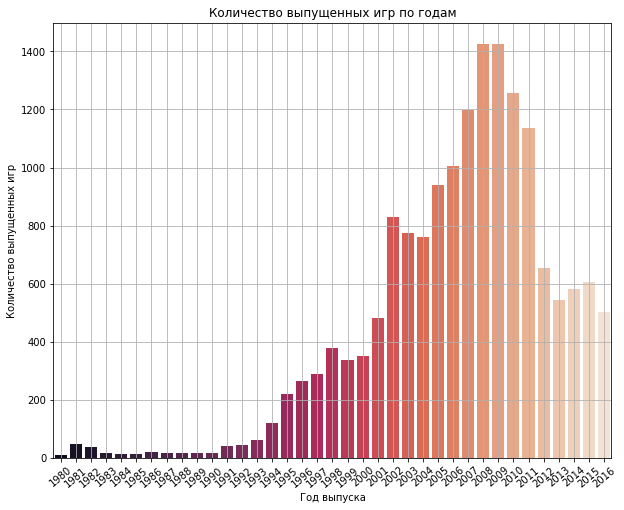

In [47]:
plt.subplots(figsize=(10, 8), sharex=True);
sns.barplot(x=games_by_year['year_of_release'], y=games_by_year['name'], palette="rocket");
plt.xlabel("Год выпуска");
plt.ylabel("Количество выпущенных игр");
plt.xticks(rotation=40);
plt.grid()
plt.title('Количество выпущенных игр по годам');


 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Самое большое количество игр выпускалось в 2008 и 2009 годах. Думаю актуальными будут сведения об играх выпущенных с 2000 года. С этого года начинается подъем.
</font>      
</div> 

In [48]:
# Выберем платформы с наибольшими суммарными продажами
(
    df['total_sales']
    .groupby(by=df['platform'])
    .agg('sum')
    .reset_index()
    .sort_values(by = 'total_sales', ascending=False).head(10)
)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [49]:
# В отдельную табличку соберем данные по шести платформам с общими продажами более чем 500 млн копий
platforms_grouped = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].sort_values(by='year_of_release')
platforms_grouped.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,undefined,0.02
4922,ESPN Extreme Games,PS,1994,Sports,0.11,0.08,0.17,0.03,NaN,NaN,undefined,0.39
10184,Jupiter Strike,PS,1994,Shooter,0.06,0.04,0.00,0.01,NaN,NaN,undefined,0.11
9930,Jikkyou Powerful Pro Yakyuu '95,PS,1994,Sports,0.00,0.00,0.11,0.01,NaN,NaN,undefined,0.12
5432,Parodius,PS,1994,Shooter,0.00,0.00,0.31,0.02,NaN,NaN,undefined,0.33


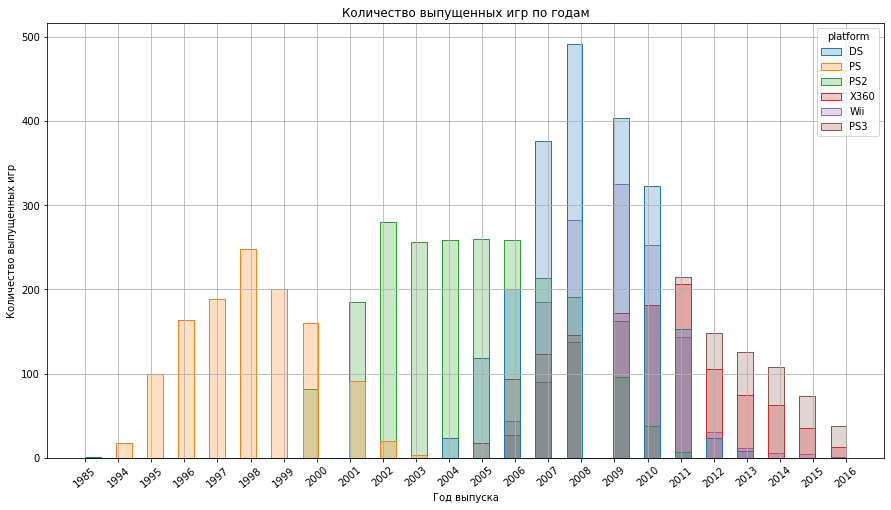

In [50]:
# построим гистограмму распределения количества выпущенных игр по годам с разбивкой на платформы
plt.subplots(figsize=(15, 8), sharex=True);
sns.histplot(data=platforms_grouped, x="year_of_release", hue='platform', discrete=False, element="step")
plt.xlabel("Год выпуска");
plt.ylabel("Количество выпущенных игр");
plt.xticks(rotation=40);
plt.grid()
plt.title('Количество выпущенных игр по годам');


 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Характерный срок появления новых платформ и исчезания старых примерно 10 лет. Для дальнейшего исследования можно взять период с 2006 по 2016 год, как раз 10 лет, и как видно по графику в эти года выпускались игры для 5 популярных платформ
</font>      
</div> 

In [52]:
actual_df = df.query('year_of_release >= "2014"').reset_index(drop=True)

In [53]:
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98


###  Исследование продаж. Выделение прибыльных платформ.

In [54]:
# Не учитывая данные за предыдущие годы, выберем несколько потенциально прибыльных платформ.

(
    actual_df['total_sales']
    .groupby(by=actual_df['platform'])
    .agg('sum')
    .reset_index()
    .sort_values(by = 'total_sales', ascending=False)
    .head(10)
)

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


In [55]:
#теперь соберем все данные по платформам с наибольшими продажами
platforms_max_sales = (
    actual_df[actual_df['platform']
              .isin(['PS4','XOne', '3DS', 'PS3', 'X360','WiiU', 'PC', 'PSV', 
                     'Wii',  'PSP'])]
    .sort_values(by='year_of_release')
    .reset_index(drop=True)
)
display(platforms_max_sales.head())
display(platforms_max_sales.tail())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Thief (2014),PS3,2014,Action,0.10,0.17,0.02,0.05,NaN,NaN,undefined,0.34
1,Just Dance 2015,PS3,2014,Misc,0.13,0.08,0.00,0.04,NaN,6.8,E10+,0.25
2,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01
3,Hatsune Miku: Project Diva F 2nd,PS3,2014,Misc,0.09,0.03,0.10,0.03,78.0,8.6,T,0.25
4,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,undefined,0.06


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1684,Super Robot Wars OG: The Moon Dwellers,PS3,2016,Misc,0.00,0.00,0.06,0.00,NaN,NaN,undefined,0.06
1685,Odin Sphere: Leifthrasir,PS3,2016,Role-Playing,0.02,0.01,0.03,0.01,NaN,7.0,T,0.07
1686,Assetto Corsa,PS4,2016,Racing,0.00,0.05,0.00,0.01,73.0,6.2,E,0.06
1687,Dark Souls III,PC,2016,Role-Playing,0.00,0.07,0.00,0.00,89.0,8.6,M,0.07
1688,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


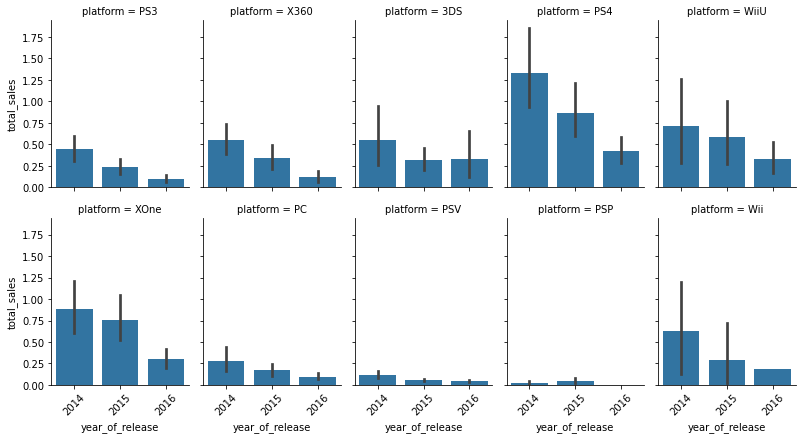

In [56]:
g = sns.FacetGrid(col="platform", col_wrap=5, height=3, aspect=.75, data=platforms_max_sales)
g.map(sns.barplot, "year_of_release", "total_sales", order=['2014','2015','2016']);
g.set_xticklabels(rotation=45);

 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Судя по представленным графикам - продажи по всем платформам падают. Продажи в 2015-2016 годах, практически у всех платформ одинаково малы. Можно не включать в анализ платформы, по которым в 2016 году не было продаж: 'PSP'. 
</font>      
</div> 

In [80]:
# уберем из выборки неактуальные платформы
platforms_max_sales = (
    actual_df[actual_df['platform']
              .isin(['PS4','XOne', '3DS', 'PS3', 'X360','WiiU', 'PC', 'PSV', 
                     'Wii'])]
    .sort_values(by='year_of_release')
    .reset_index(drop=True)
)

*Построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам.*

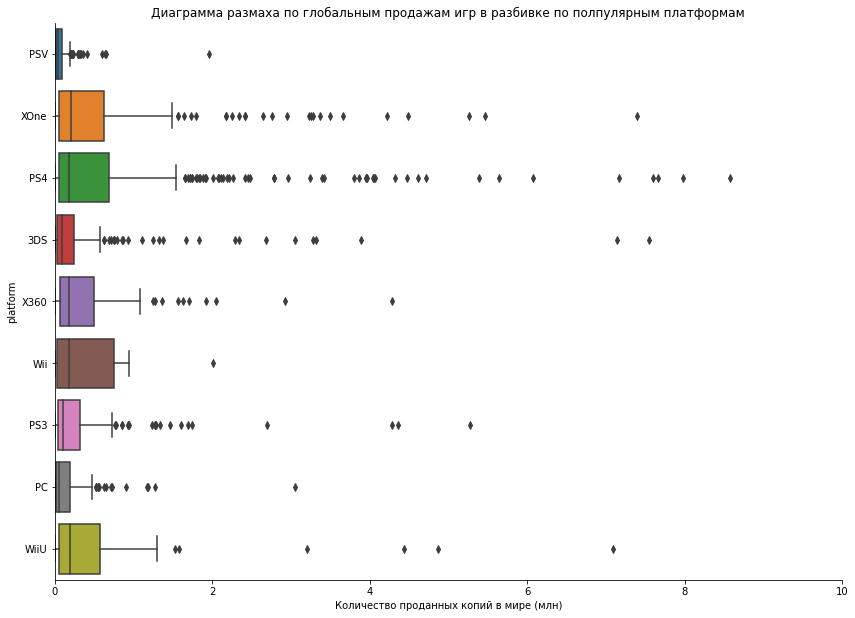

In [81]:
sns.catplot(
    x="total_sales", 
    y="platform", 
    kind="box", 
    data=platforms_max_sales, 
    orient="h", height=8.27, aspect=11.7/8.27)
plt.xlim([0, 10]);
plt.xlabel('Количество проданных копий в мире (млн)');
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по полпулярным платформам');


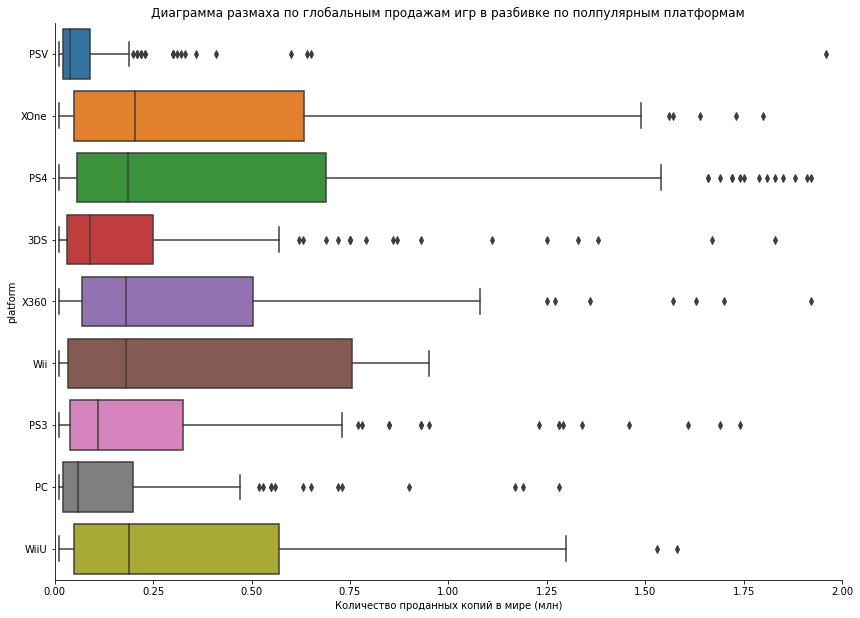

In [101]:
sns.catplot(
    x="total_sales", 
    y="platform", 
    kind="box", 
    data=platforms_max_sales, 
    orient="h", height=8.27, aspect=11.7/8.27)
plt.xlim([0, 2]);
plt.xlabel('Количество проданных копий в мире (млн)');
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по полпулярным платформам');


 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Чтобы получить видимый результат, пришлось отсечь значения "total_sales" больше 10 млн проданных копий, т.к. медианные значения по всем платформам лежат около нуля. Границы усов - а значит и большинство значений, находятся до 2 млн проданных копий, остальные значения являются выбросами, но при этом они же и самые покупаемые игры на платформах.
</font>      
</div> 

*Посмотрим, как влияют на продажи внутри самой популярной платформы "Х360"
отзывы пользователей и критиков. Построим диаграмму рассеяния и
посчитаем корреляцию между отзывами и продажами.*

In [85]:
ps4_df = (
    platforms_max_sales[platforms_max_sales['platform']
              .isin(['PS4'])]
    .sort_values(by='year_of_release')
    .reset_index(drop=True)
)
ps4_df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Onechanbara Z2: Chaos,PS4,2014,Action,0.14,0.03,0.04,0.04,57.0,6.5,M,0.25
1,LittleBigPlanet 3,PS4,2014,Platform,0.66,0.93,0.01,0.31,79.0,7.1,E,1.91
2,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64


Коэффициент корреляции между объемом продаж и оценкой критиков: 0.4026614106810416
Коэффициент корреляции между объемом продаж и оценкой пользователей: -0.04013158947269733


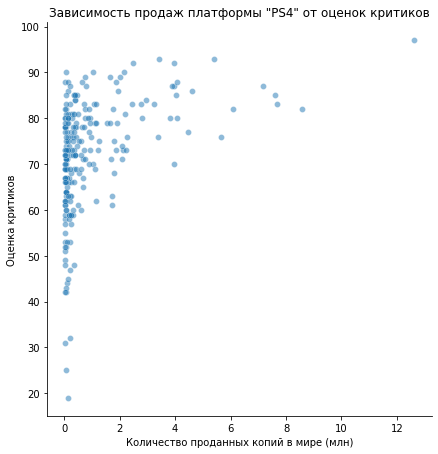

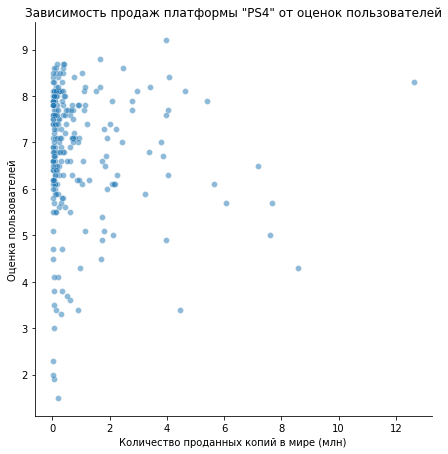

In [86]:
sns.relplot(x="total_sales", y="critic_score",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=ps4_df);
plt.title('Зависимость продаж платформы "PS4" от оценок критиков')
plt.xlabel('Количество проданных копий в мире (млн)')
plt.ylabel('Оценка критиков');
sns.relplot(x="total_sales", y="user_score",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=ps4_df);
plt.title('Зависимость продаж платформы "PS4" от оценок пользователей')
plt.xlabel('Количество проданных копий в мире (млн)')
plt.ylabel('Оценка пользователей');

#Посчитаем коэффициент корреляции между отзывами и продажами
print ('Коэффициент корреляции между объемом продаж и оценкой критиков:', 
       ps4_df['total_sales'].corr(ps4_df['critic_score']))

print ('Коэффициент корреляции между объемом продаж и оценкой пользователей:', 
       ps4_df['total_sales'].corr(ps4_df['user_score']))


 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Коэффициент корреляции отношения объема продаж и оценок критиков равен 0,4 - это указывает на слабоположительную связь, т.е. игры с высокими оценками будут лучше продаваться, но не всегда. Коэффициент корреляции пирсона для отношения объема продаж и пользователей имеет небольшое значение, близкое к нулю, а значит связь очень слабая. При высоких оценках критиков игры и хорошо продаются и так же плохо, есть игры, хорошо продаваемые даже при отсутствии оценок. Это не значит, что связи нет совсем, вероятно она просто имеет более сложный, не линейный характер. 
</font>      
</div> 

Соотнесем выводы с продажами игр на других платформах.

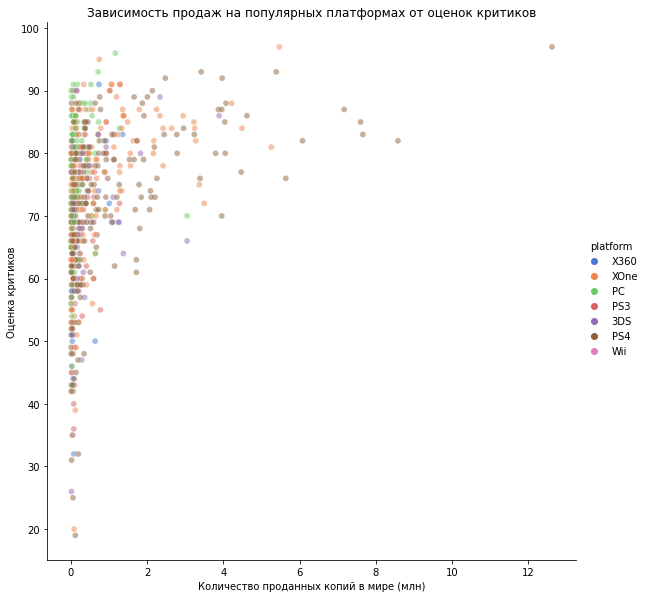

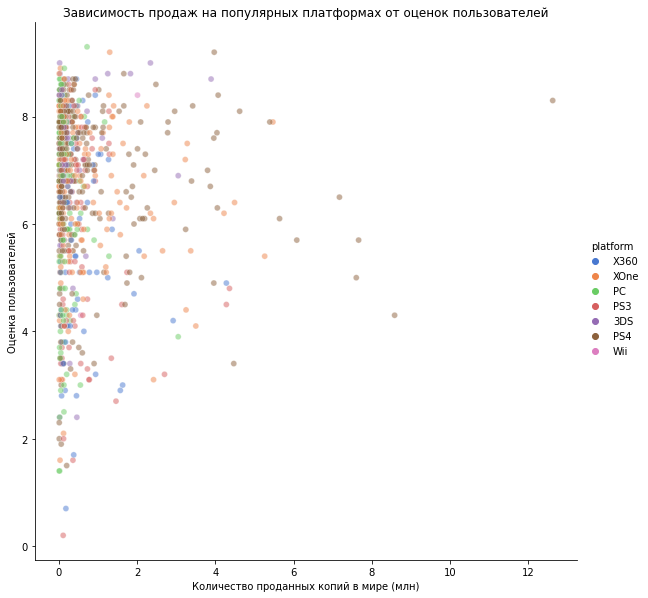

In [61]:
sns.relplot(x="total_sales", y="critic_score", hue = "platform",
            alpha=.5, palette="muted",
            height=8, data=platforms_max_sales);
plt.title('Зависимость продаж на популярных платформах от оценок критиков')
plt.xlabel('Количество проданных копий в мире (млн)')
plt.ylabel('Оценка критиков');
sns.relplot(x="total_sales", y="user_score", hue = "platform",
            alpha=.5, palette="muted",
            height=8, data=platforms_max_sales);
plt.title('Зависимость продаж на популярных платформах от оценок пользователей')
plt.xlabel('Количество проданных копий в мире (млн)')
plt.ylabel('Оценка пользователей');

 <div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Так же как и для продаж игр на "X360", на всех остальных популярных платформах наблюдается слабоположительная связь между объемом продаж и оценками игр. При высоких оценках критиков игры и хорошо продаются и так же плохо, есть игры, хорошо продаваемые даже при отсутствии оценок.
</font>      
</div> 

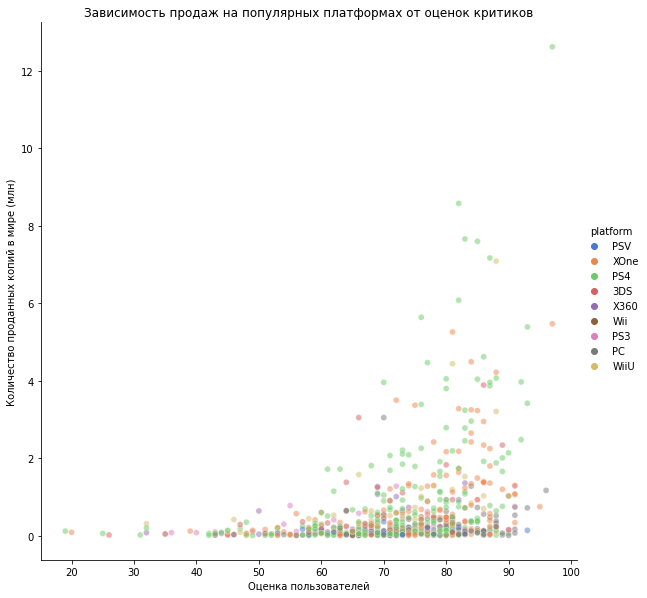

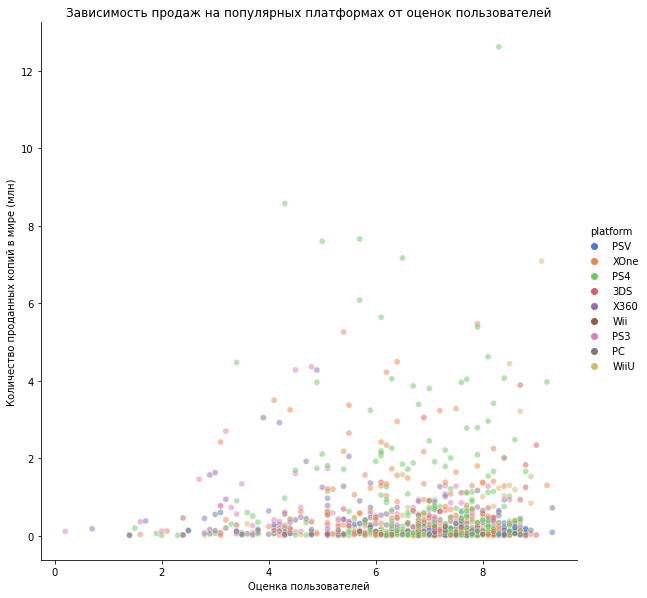

In [87]:
sns.relplot(x="critic_score", y="total_sales", hue = "platform",
            alpha=.5, palette="muted",
            height=8, data=platforms_max_sales);
plt.title('Зависимость продаж на популярных платформах от оценок критиков')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий в мире (млн)');
sns.relplot(x="user_score", y="total_sales", hue = "platform",
            alpha=.5, palette="muted",
            height=8, data=platforms_max_sales);
plt.title('Зависимость продаж на популярных платформах от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий в мире (млн)');

### Исследование распределения игр по жанрам
Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?

In [62]:
games_by_genre = (
    actual_df
    .groupby(by=df['genre'])
    .agg({'name':'count', 'total_sales':'sum'})
    .reset_index()
    .sort_values(by = 'name', ascending=False)
)

games_by_genre.columns = ['genre', 'count_games', 'total_sales']
games_by_genre

,genre,count_games,total_sales
0,Action,341,120.42
10,Sports,245,84.08
8,Shooter,212,114.59
7,Role-Playing,178,94.58
4,Platform,161,102.92
6,Racing,141,67.56
3,Misc,138,59.17
2,Fighting,99,24.70
9,Simulation,71,26.29
5,Puzzle,46,21.26


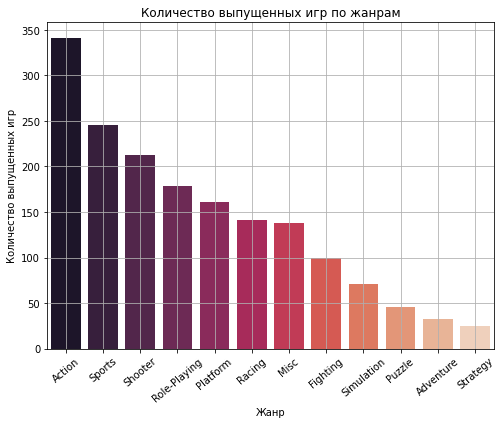

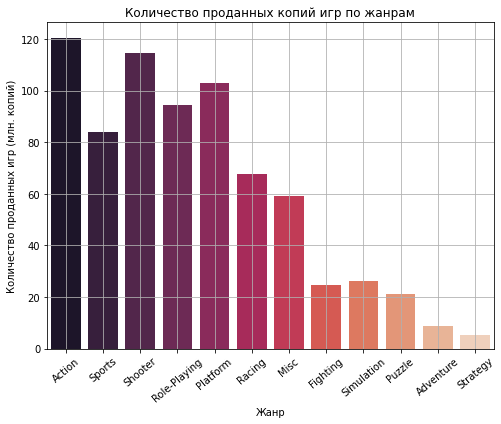

In [63]:
plt.subplots(figsize=(8, 6), sharex=True);
sns.barplot(x=games_by_genre['genre'], y=games_by_genre['count_games'], palette="rocket");
plt.xlabel("Жанр");
plt.ylabel("Количество выпущенных игр");
plt.xticks(rotation=40);
plt.grid()
plt.title('Количество выпущенных игр по жанрам');

plt.subplots(figsize=(8, 6), sharex=True);
sns.barplot(x=games_by_genre['genre'], y=games_by_genre['total_sales'], palette="rocket");
plt.xlabel("Жанр");
plt.ylabel("Количество проданных игр (млн. копий)");
plt.xticks(rotation=40);
plt.grid()
plt.title('Количество проданных копий игр по жанрам');

<div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
Итак судя по распределению самыми выпускаемыми являются жанры:
    
    1. Экшн
    2. Спорт
    3. Игры смешанных жанров
    4. Сюжетно-ролевые
    5. Шутер
    
А самыми прибыльными являются:
    
    1. Экшн
    2. Спорт
    3. Шутер
    4. Сюжетно-ролевые игры
    5. Платформер
    
Самые низкие продажи у игр в жанрах "Стратегия", "Приключения".
</font>      
</div>

In [88]:
games_by_genre = (
    actual_df
    .groupby(by=df['genre'])
    .agg({'name':'count', 'total_sales':'median'})
    .reset_index()
    .sort_values(by = 'total_sales', ascending=False)
)

games_by_genre.columns = ['genre', 'count_games', 'total_sales_median']
games_by_genre

,genre,count_games,total_sales_median
4,Platform,161,0.120
8,Shooter,212,0.120
0,Action,341,0.110
7,Role-Playing,178,0.110
3,Misc,138,0.100
6,Racing,141,0.090
10,Sports,245,0.090
2,Fighting,99,0.080
9,Simulation,71,0.080
1,Adventure,32,0.075


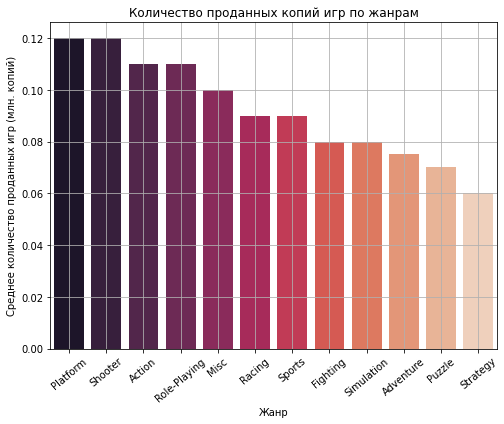

In [90]:
plt.subplots(figsize=(8, 6), sharex=True);
sns.barplot(x=games_by_genre['genre'], y=games_by_genre['total_sales_median'], palette="rocket");
plt.xlabel("Жанр");
plt.ylabel("Среднее количество проданных игр (млн. копий)");
plt.xticks(rotation=40);
plt.grid()
plt.title('Количество проданных копий игр по жанрам');

самыми прибыльными являются:

1. Платформер
2. Шутер
3. Экшн
4. Сюжетно-ролевые игры
5. Смешанный жанр

Самые низкие продажи у игр в жанрах "Стратегия", "Паззл".

### Вывод по разделу.

В этом разделе мы изучили данные и сделали следующие выводы:

1. Актуальный для исследования период с 2014 по 2016 год
        
2. Прибыльные платформы в этом периоде времени: 'PS4','XOne', '3DS', 'PS3', 'X360','WiiU', 'PC', 'PSV', 'Wii', 'PSP'. Объем продаж на этих 10 популярных платформах снижается.
        
3. Самый прибыльный по медианным продажам жанр - платформер, а самый низкий доход у жанра стратегия.

##  Портрет пользователя каждого региона

### Северная Америка

#### Самые популярные платформы (топ-5)

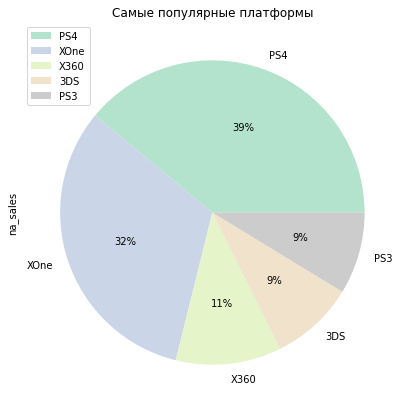

In [93]:
#группируем данные по платформам и суммарным продажам
pop_platforms_na = (
    actual_df
    .groupby('platform')['na_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending=False)
    .head(5)
)
#строим круговую диаграмму по платформам и суммарным продажам
pop_platforms_na.plot(kind='pie', y= 'na_sales', labels=pop_platforms_na['platform'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные платформы', colormap = 'Pastel2');

Самые популярные платформы в Северной Америке:

1. PS4
2. XOne
3. X360
4. 3DS
5. PS3

#### Самые популярные жанры (топ-5)

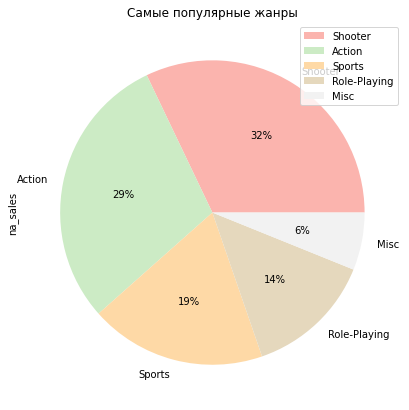

In [67]:
#группируем данные по жанрам и суммарным продажам
pop_genres_na = (
    actual_df
    .groupby('genre')['na_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending=False)
    .head(5)
)

#строим круговую диаграмму по жанрам и суммарным продажам
pop_genres_na.plot(kind='pie', y= 'na_sales', labels=pop_genres_na['genre'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные жанры', colormap = 'Pastel1');

Самые популярные жанры игр в Северной Америке:

1. Шутер
2. Экшн
3. Спорт
4. Сюжетно-ролевые
5. Игры смешанных жанров

#### Влияение рейтинга ESRB на продажи

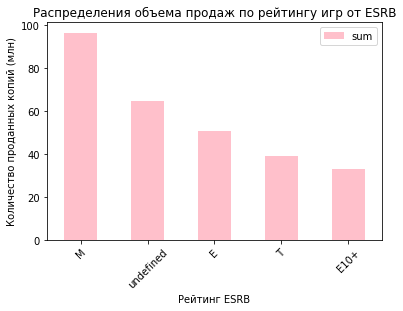

In [95]:
#строим столбчатую диаграмму распределения объема продаж по рейтингу игр от ESRB
(
    actual_df
    .groupby('rating')['na_sales']
    .agg(['sum'])
    .sort_values('sum', ascending=False)
    .plot(kind='bar', color = 'pink', title='Распределения объема продаж по рейтингу игр от ESRB',
         xlabel='Рейтинг ESRB', ylabel='Количество проданных копий (млн)', rot=45)
);

Больше всего продано игр с рейтингом "Е" - для всех возрастов, интересные и взрослым и детям, на втором месте "М" - игры для лиц старше 17 лет. Около 300 млн проданных копий игр вообще не имеют рейтинга. Не пользуются спросом игры с рейтингом ЕС, то есть для детей от 3 лет 

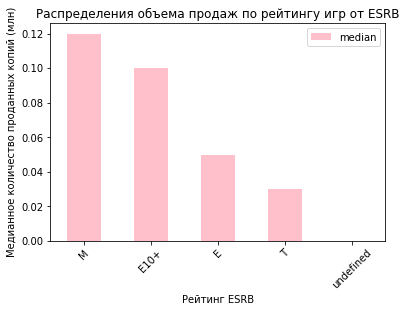

In [96]:
#строим столбчатую диаграмму распределения среднего объема продаж по рейтингу игр от ESRB
(
    actual_df
    .groupby('rating')['na_sales']
    .agg(['median'])
    .sort_values('median', ascending=False)
    .plot(kind='bar', color = 'pink', title='Распределения объема продаж по рейтингу игр от ESRB',
         xlabel='Рейтинг ESRB', ylabel='Медианное количество проданных копий (млн)', rot=45)
);

### Европа

#### Самые популярные платформы (топ-5)

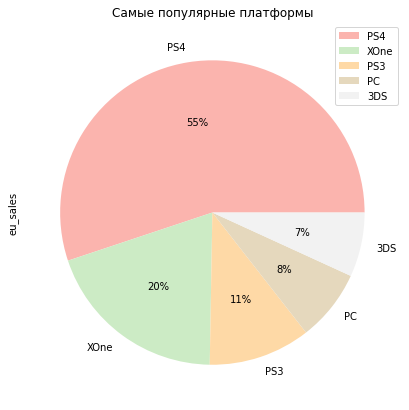

In [69]:
pop_platforms_eu = (
    actual_df
    .groupby('platform')['eu_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending=False)
    .head(5)
)
pop_platforms_eu.plot(kind='pie', y= 'eu_sales', labels=pop_platforms_eu['platform'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные платформы', colormap = 'Pastel1');

Самые популярные платформы в Европе:

1. PS4
2. XOne
3. PS3
4. PC
5. 3DS

#### Самые популярные жанры (топ-5)

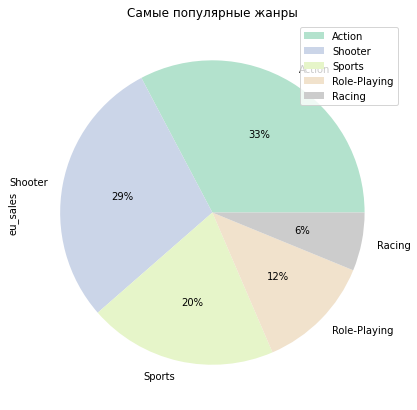

In [98]:
pop_genre_eu = (
    actual_df
    .groupby('genre')['eu_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending=False)
    .head(5)
)
pop_genre_eu.plot(kind='pie', y= 'eu_sales', labels=pop_genre_eu['genre'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные жанры', colormap = 'Pastel2');

Самые популярные жанры игр в Европе:

1. Экшн
2. Спорт
3. Шутер
4. Игры смешанных жанров
5. Гонки

#### Влияение рейтинга ESRB на продажи

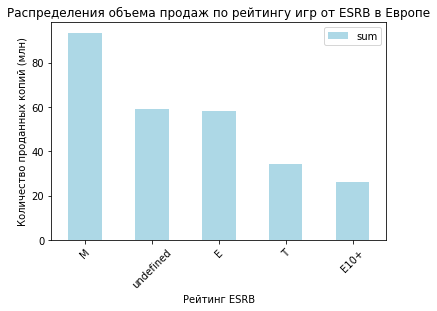

In [100]:
(
    actual_df
    .groupby('rating')['eu_sales']
    .agg(['sum'])
    .sort_values('sum', ascending=False)
    .plot(kind='bar', color = 'lightblue', title='Распределения объема продаж по рейтингу игр от ESRB в Европе',
         xlabel='Рейтинг ESRB', ylabel='Количество проданных копий (млн)', rot=45)
);

Больше всего продано игр с рейтингом "Е" - для всех возрастов, интересные и взрослым и детям, на втором месте "М" - игры для лиц старше 17 лет. Около 300 млн проданных копий игр вообще не имеют рейтинга. Не пользуются спросом игры с рейтингом ЕС, то есть для детей от 3 лет 

### Япония

#### Самые популярные платформы (топ-5)

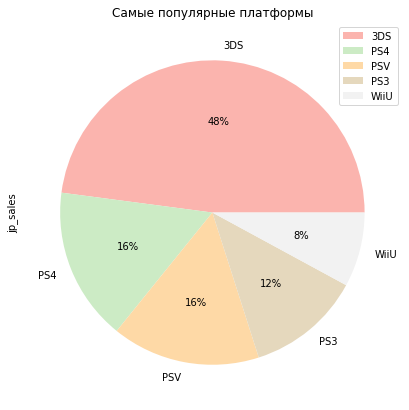

In [72]:
pop_platforms_jp = (
    actual_df
    .groupby('platform')['jp_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'jp_sales', ascending=False)
    .head(5)
)
pop_platforms_jp.plot(kind='pie', y= 'jp_sales', labels=pop_platforms_jp['platform'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные платформы', colormap = 'Pastel1');

Самые популярные платформы в Японии:

1. DS 
2. 3DS
3. PS3
4. PSP
5. Wii

#### Самые популярные жанры (топ-5)

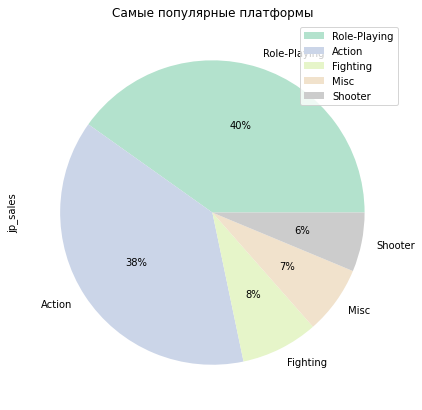

In [73]:
pop_genres_jp = (
    actual_df
    .groupby('genre')['jp_sales']
    .agg('sum')
    .reset_index()
    .sort_values(by = 'jp_sales', ascending=False)
    .head(5)
)
pop_genres_jp.plot(kind='pie', y= 'jp_sales', labels=pop_genres_jp['genre'], autopct='%1.0f%%',
                      legend=True, figsize=(7, 7), title='Самые популярные платформы', colormap = 'Pastel2');

Самые популярные жанры игр в Японии:

1. Сюжетно-ролевые
2. Экшн
3. Единоборства
4. Игры смешанных жанров
5. Шутер

#### Влияение рейтинга ESRB на продажи

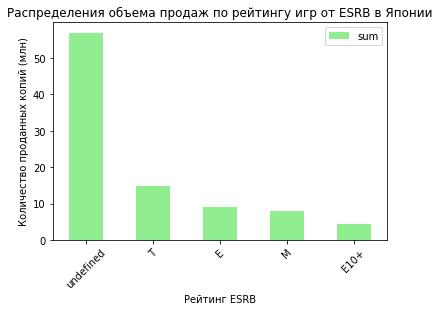

In [74]:
(
    actual_df
    .groupby('rating')['jp_sales']
    .agg(['sum'])
    .sort_values('sum', ascending=False)
    .plot(kind='bar', color = 'lightgreen', title='Распределения объема продаж по рейтингу игр от ESRB в Японии',
         xlabel='Рейтинг ESRB', ylabel='Количество проданных копий (млн)', rot=45)
);

Большинство игр, проданных в Японии не имеют рейтинга ESRB. На втором месте игры для всех возрастов.

### Вывод по разделу

У пользователей из Северной Америки самой популярной платформой является “X360”, в Европе “PS3”, а в Японии на первом месте “DS”, которая в Европе и Америке на 4 месте по популярности. Самая большая доля продаж всех игр приходится на Северную Америку, затем Европа, потом Япония. Эта разница обусловлена самим объемом рынка, а так же культурными и поведенческими отличиями игроков.

Самый популярный жанр у игроков из Северной Америки и Европы - экшн, но есть и отличие последний по популярности жанр в Америке - сюжетно-ролевые игры, а в Европе - гонки. Пользователи из Японии Предпочитают прежде всего сюжетно-ролевые игры, а вместо шутеров в их топ-5 жанров входят игры в жанре платформер. Предпочтения игроков из Европы и Америки снова сильно отличается от японцев, как в жанрах, так и по предпочитаемым платформам. 

Рейтинг ESRB почти одинаково влияет на продажи в Европе и Северной Америке: на первом месте игры для всех возрастов, а на последнем для детей младшего возраста. Но в Японии большинство продаваемых игр не имеет рейтинга, значит на продажи он не влияет в такой степени как в других регионах. В Японии действует собственная некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии - CERO - Computer Entertainment Rating Organization. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт.   

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза всегда формулируется со знаком равенства. В данном случае нам надо сравнить средние величины двух независимых выборок, для этого подойдет метод статистического анализа t-test.

Сформулируем нулевую и альтернативную гипотезу для проверки:

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC **равны**

- H1 - Средние пользовательские рейтинги платформ Xbox One и PC **не равны**

Чтобы подвердить или опровергнуть нулевую гипотезу вычислим с помощью t-теста p-value и сравним его с установленным в 5% критическим уровнем статистической значимости.

In [75]:
#выделим две отдельные выборки для платформ Xbox One и PC
xbox_one_df = actual_df.query('platform == "XOne"')
pc_df = actual_df.query('platform == "PC"')

In [76]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    xbox_one_df['user_score'], 
    pc_df['user_score'],
    nan_policy="omit" #nan_policy -  политика обработки пропусков, попросим ttest не учитывать NaN
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: #сравним получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
В результате проведенного t-теста отвергнуть нулевую гипотезу не получилось, а значит средние пользовательские рейтинги не отличаются для разных платформ.
</font>      
</div>

### Средние пользовательские рейтинги жанров *Action* и *Sports* разные

Нулевая гипотеза всегда формулируется со знаком равенства. В данном случае нам надо сравнить средние величины двух независимых выборок, для этого подойдет метод статистического анализа t-test. Чтобы подвердить утверждение, что cредние пользовательские рейтинги жанров Action и Sports разные нулевая гипотеза должна быть отвергнута. 

Сформулируем нулевую и альтернативную гипотезу для проверки:

- H0 - Средние пользовательские рейтинги жанров Action и Sports **равны**

- H1 - Средние пользовательские рейтинги жанров Action и Sports **не равны**

Чтобы подвердить или опровергнуть нулевую гипотезу вычислим с помощью t-теста p-value и сравним его с установленным в 5% критическим уровнем статистической значимости.

In [78]:
action_df = actual_df.query('genre == "Action"')
sports_df = actual_df.query('genre == "Sports"')

In [79]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    action_df['user_score'], 
    sports_df['user_score'],
    equal_var = False,
    nan_policy="omit"
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: #сравним получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


<div style="border:solid SteelBlue 3px; padding: 20px">
<font color='Black'>
В результате проведенного t-теста нулевая гипотеза была отвергнута, следовательно подтверждается гипотеза, что cредние пользовательские рейтинги жанров Action и Sports разные.

</font>      
</div>

## Общий вывод

В исходных данных обнаружилось большое количество пропущенных значений в столбцах с оценками игр критиками, пользователями и рейтинговым агентством.  Было принято решение эти пропуски никак не обрабатывать, чтобы не портить статистику остальных оценок. Природа пропусков не имеет никакой видимой закономерности, данные пропущены как и у популярных игр, так и игр с нулевыми продажами, так же нет связи и с регионом производства игр.

Проанализировав количество выпущенных игр и продажи по годам выпуска игр, для дальнейшего исследования взяли актуальный период с 2014 по 2016 год.  Рынок компьютерных игр очень быстро меняется, игры и платформы выходят из моды и заменяются на новые в короткие сроки. В эти годы выпускались игры для  популярных платформ: `'PS4','XOne', '3DS', 'PS3', 'X360','WiiU', 'PC', 'PSV', 'Wii', 'PSP'`
Дальнейший анализ показал, что продажи по всем платформам падают. Продажи в 2015-2016 годах, практически у всех платформ одинаково малы. Можно не включать в анализ платформы, по которым в 2016 году не было продаж: 'PSP'.

Чтобы определить зависимость объема продаж от оценок пользователей посчитали коэффициент корреляцииКоэффициент корреляции отношения объема продаж и оценок критиков равен 0,4 - это указывает на слабоположительную связь, т.е. игры с высокими оценками будут лучше продаваться, но не всегда. Коэффициент корреляции пирсона для отношения объема продаж и пользователей имеет небольшое значение, близкое к нулю, а значит связь очень слабая. При высоких оценках критиков игры и хорошо продаются и так же плохо, есть игры, хорошо продаваемые даже при отсутствии оценок. Это не значит, что связи нет совсем, вероятно она просто имеет более сложный, не линейный характер.

Самыми выпускаемыми и продаваемыми жанрами игр оказались платформер, экшн и шутер, а самые низкие продажи у стратегий и пазлов.

Портрет пользователей из разных регионов, который нужно учитывать при построении рекламных кампаний в этих регионах:

- У пользователей из Северной Америки и Европы самой популярной платформой является “PS4”,  а в Японии на первом месте “3DS”. Самая большая доля продаж всех игр приходится на Северную Америку, затем Европа, потом Япония.
- Самый популярный жанр у игроков из Северной Америки - шутер. В Европе - экшн. Пользователи из Японии предпочитают прежде всего сюжетно-ролевые игры.
- Рейтинг ESRB  влияет на продажи в Северной Америке: на первом месте "М" - игры для лиц старше 17 лет, так же и в Европе. На продажи в Японии рейтинг ESRB не влияет, т.к. в Японии своя организация присуждающая рейтинг **CERO.**

Так же мы проверили предположения о различиях в пользовательских рейтингах у платформ Xbox One и PC, и жанров Action и Sports. Проверка гипотез показала, что у игр выпущенных для этих платформ средние рейтинги равны, а вот у разных жанров и рейтинги вероятно будут разными.

При прогнозировани продаж на следующий период, нужно учитывать следующие факторы в разрере по регионам продаж - актуальные платформы, самые покупаемые жанры, а так же рейтинги пользователей и критиков.